In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# purchasing data
data = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])

In [5]:
# drop user id column 
data = data.drop('User ID', axis=1)

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [7]:
data.sum()

Gender                  196
Age                   15062
EstimatedSalary    27897000
Purchased               143
dtype: int64

In [8]:
143/400

0.3575

In [9]:
(400-143)/400

0.6425

In [10]:
#the output is unbalance

# Balance the output by up Sampling

# Feature Scaling 

In [11]:
data_scale = data[['Age', 'EstimatedSalary']]

In [12]:
data_no_scale = data[['Gender', 'Purchased']]

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_scale = sc.fit_transform(data_scale)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
data_scale = pd.DataFrame(data_scale)

In [15]:
#concat scaled and not scaled again
data = pd.concat([data_scale, data_no_scale], axis=1)

In [16]:
data.head()

,0,1,Gender,Purchased
0,0.023810,0.029630,1,0
1,0.404762,0.037037,1,0
2,0.190476,0.207407,0,0
3,0.214286,0.311111,0,0
4,0.023810,0.451852,1,0


In [17]:
data.columns = ['Age', 'EstimatedSalary', 'Gender', 'Purchased']

In [18]:
data.head()

,Age,EstimatedSalary,Gender,Purchased
0,0.023810,0.029630,1,0
1,0.404762,0.037037,1,0
2,0.190476,0.207407,0,0
3,0.214286,0.311111,0,0
4,0.023810,0.451852,1,0


# Spliting the data

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data, data["Gender"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

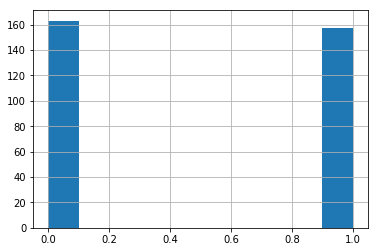

In [20]:
data_train['Gender'].hist()

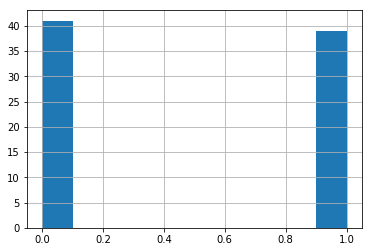

In [21]:
data_test['Gender'].hist()

# split should be before scaling 

In [22]:
X_train = data_train[['Age', 'EstimatedSalary', 'Gender']]
y_train = data_train['Purchased']
X_test = data_test[['Age', 'EstimatedSalary', 'Gender']]
y_test = data_test['Purchased']

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_predict = model.predict(X_train)

In [27]:
y_predict_test = model.predict(X_test)

In [28]:
accuracy_train = accuracy_score(y_predict, y_train)
accuracy_train

0.834375

In [29]:
accuracy_test = accuracy_score(y_predict_test, y_test)
accuracy_test

0.85

# K Nearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [32]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_predict_knn = classifier.predict(X_train)

In [34]:
y_predict_knn_test = classifier.predict(X_test)

In [35]:
accuracy_score(y_predict_knn, y_train)

0.91875

In [36]:
accuracy_score(y_predict_knn_test, y_test)

0.925

# Finding the best K

In [37]:
accuracy_score_knn_train = []
accuracy_score_knn_test = []
for i in range(20):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = i+1, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_predict_knn = classifier.predict(X_train)
    y_predict_knn_test = classifier.predict(X_test)
    accuracy_score_knn_train.append(accuracy_score(y_predict_knn, y_train))
    accuracy_score_knn_test.append(accuracy_score(y_predict_knn_test, y_test))

Text(0.5, 1.0, 'KNN Scores vs K neighbors')

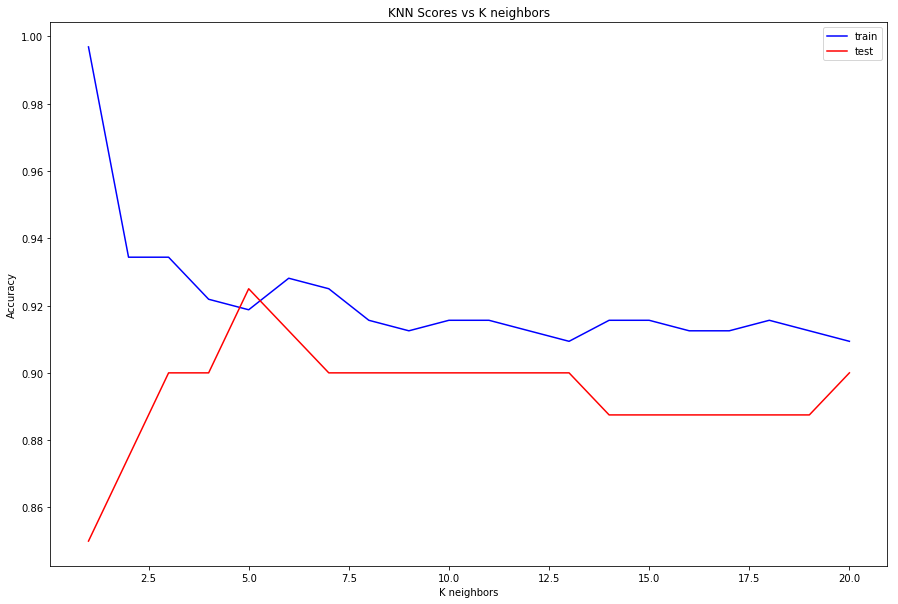

In [38]:
plt.figure(figsize = (15,10))
plt.plot(range(1,21,1), accuracy_score_knn_train, color = 'b')
plt.plot(range(1,21,1), accuracy_score_knn_test, color = 'r')
plt.legend(['train', 'test'])
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Scores vs K neighbors')

In [39]:
X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data[['Purchased']]

In [40]:
knn = KNeighborsClassifier()

In [41]:
param_name = 'n_neighbors'

In [42]:
param_range = list(range(1,21))

In [43]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve

In [44]:
train_scores, test_scores = validation_curve(knn, X, y, param_name, param_range, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

In [45]:
train_scores = np.mean(train_scores, axis = 1)

In [46]:
test_scores = np.mean(test_scores, axis = 1)

Text(0.5, 1.0, 'KNN Scores vs K neighbors')

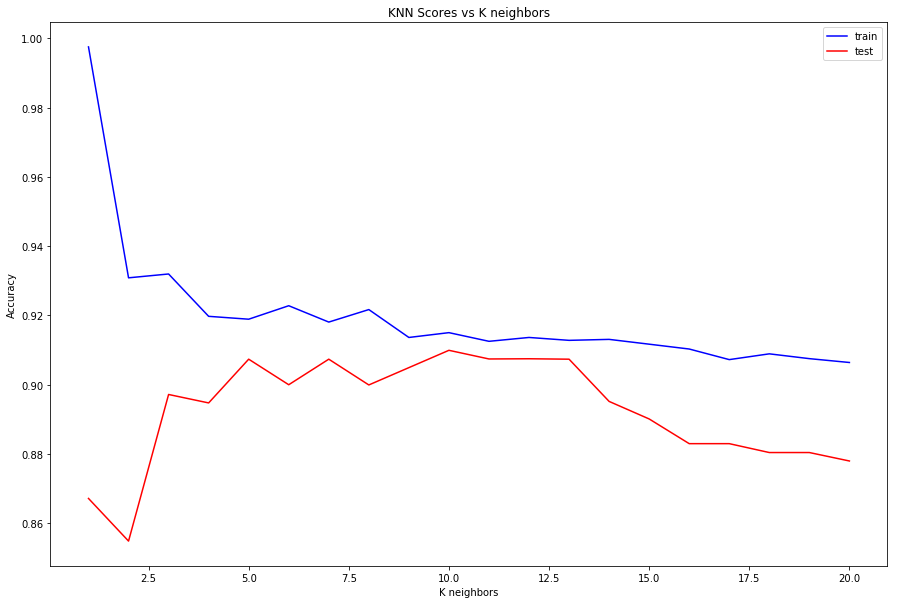

In [47]:
plt.figure(figsize = (15,10))
plt.plot(range(1,21,1), train_scores, color = 'b')
plt.plot(range(1,21,1), test_scores, color = 'r')
plt.legend(['train', 'test'])
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Scores vs K neighbors')

In [48]:
diff = train_scores - test_scores
diff

array([0.13036818, 0.07601207, 0.03479128, 0.02500417, 0.01154182,
       0.02281185, 0.01071311, 0.02176562, 0.00870921, 0.00509888,
       0.00509733, 0.00614978, 0.00544075, 0.01791206, 0.02158882,
       0.02732399, 0.02426533, 0.02849611, 0.02710876, 0.02843744])

Text(0.5, 1.0, 'KNN difference in scores vs K neighbors')

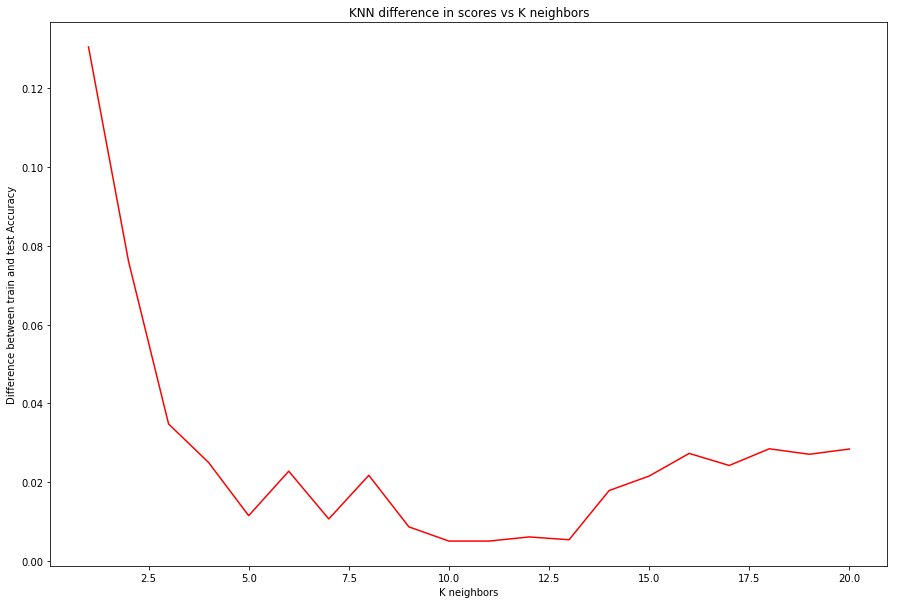

In [49]:
plt.figure(figsize = (15,10))
plt.plot(range(1,21,1), diff, color = 'r')
plt.xlabel('K neighbors')
plt.ylabel('Difference between train and test Accuracy')
plt.title('KNN difference in scores vs K neighbors')

In [50]:
k = np.argmin(np.array(diff))
#the best K
test_scores[k]

0.9074015009380861

In [51]:
k

10

# Logistic regression K fold

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
model = LogisticRegression()

In [54]:
X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data[['Purchased']]

In [55]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve

In [56]:
param_name = 'max_iter'

In [57]:
param_range = [100]

In [58]:
train_scores, test_scores = validation_curve(model, X, y, param_name, param_range, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [59]:
train_scores = np.mean(train_scores, axis = 1)
train_scores

array([0.83221375])

In [60]:
test_scores = np.mean(test_scores, axis = 1)
test_scores

array([0.82510475])